# Crime Data Analysis

##Data Loading

In [ ]:
import urllib.request

In [ ]:
dataset=urllib.request.urlretrieve("https://query.data.world/s/d4je5crtjeezijfa6j7oo5lov6ejxd")

In [ ]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/d4je5crtjeezijfa6j7oo5lov6ejxd')

In [ ]:
df

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"
...,...,...,...,...,...,...,...
56009,2016-07187,09/30/2016 04:05:00 PM,09/28/2016 17:00 - 18:00,Larceny from Residence,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA"
56010,2016-07189,09/30/2016 05:38:00 PM,09/30/2016 16:30 - 17:38,Hit and Run,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA"
56011,2016-07192,09/30/2016 06:52:00 PM,09/16/2016 18:52 - 09/30/2016 18:52,Harassment,702.0,Riverside,"0 Soden St, Cambridge, MA"
56012,2016-07194,09/30/2016 07:52:00 PM,09/30/2016 19:51,Hit and Run,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA"


In [ ]:
df.columns

Index(['File Number', 'Date of Report', 'Crime Date Time', 'Crime',
       'Reporting Area', 'Neighborhood', 'Location'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56014 entries, 0 to 56013
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   File Number      56014 non-null  object 
 1   Date of Report   56014 non-null  object 
 2   Crime Date Time  56014 non-null  object 
 3   Crime            56014 non-null  object 
 4   Reporting Area   56012 non-null  float64
 5   Neighborhood     56012 non-null  object 
 6   Location         55931 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.0+ MB


In [ ]:
for location in df.Location:
    if location=="0":
        location="Not Reported"

In [ ]:
df.Location

0                  400 Massachusetts Avenue, Cambridge, MA
1                      200 HAMPSHIRE STREET, Cambridge, MA
2        DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...
3                      100 SCIARAPPA STREET, Cambridge, MA
4                 1200 Massachusetts Avenue, Cambridge, MA
                               ...                        
56009                        0 FAIRMONT AVE, Cambridge, MA
56010                2000 MASSACHUSETTS AVE, Cambridge, MA
56011                            0 Soden St, Cambridge, MA
56012       University Rd & Mount Auburn St, Cambridge, MA
56013                   BRATTLE ST & JFK ST, Cambridge, MA
Name: Location, Length: 56014, dtype: object

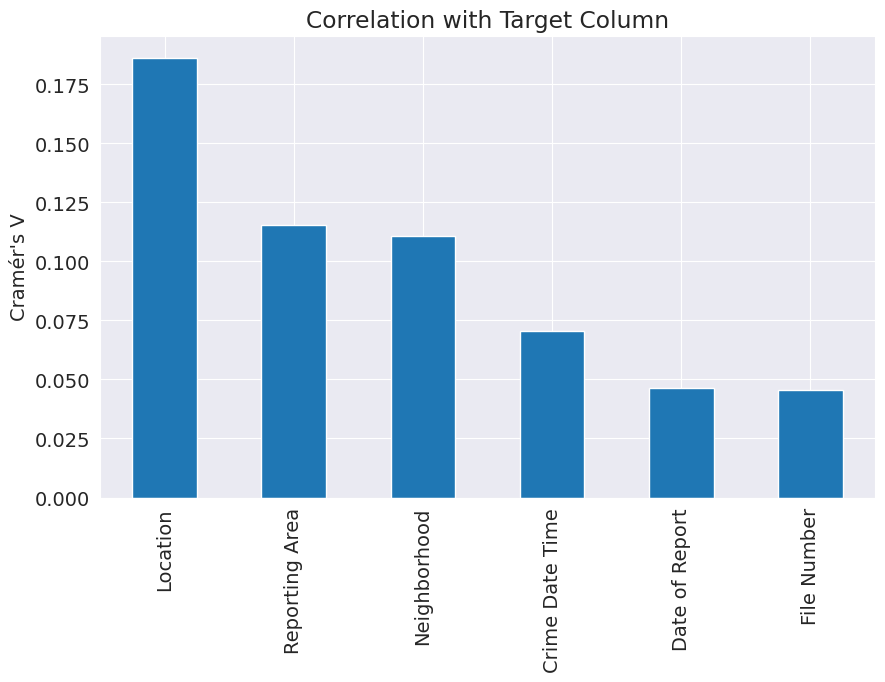

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Assuming df is your DataFrame and 'Target' is your target column
cols = df.columns.drop('Crime')  # Exclude the target column from the features
correlations = {}

for col in cols:
    corr = cramers_v(df[col], df['Crime'])  # Compute correlation with the target
    correlations[col] = corr

# Convert to a Series for easy plotting
corr_series = pd.Series(correlations)

# Sort the values for better visualization
corr_series = corr_series.sort_values(ascending=False)

# Visualize the correlations
plt.figure(figsize=(10, 6))
corr_series.plot(kind='bar')
plt.title('Correlation with Target Column')
plt.ylabel('Cramér\'s V')
plt.show()

In [ ]:
selected_columns=["Date of Report","Crime","Reporting Area","Neighborhood","Location", "Crime Date Time"]
len(selected_columns)

6

In [ ]:
survey_df = df[selected_columns].copy()
for location in survey_df.Location:
    if location==" ":
        location="Not Reported"
survey_df.shape

(56014, 6)

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56014 entries, 0 to 56013
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date of Report   56014 non-null  object 
 1   Crime            56014 non-null  object 
 2   Reporting Area   56012 non-null  float64
 3   Neighborhood     56012 non-null  object 
 4   Location         55931 non-null  object 
 5   Crime Date Time  56014 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.6+ MB


In [ ]:
survey_df

,Date of Report,Crime,Reporting Area,Neighborhood,Location,Crime Date Time
0,01/01/2009 12:39:00 AM,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",1/1/09 0:39
1,01/01/2009 01:34:00 AM,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",1/1/09 1:34
2,01/01/2009 01:43:00 AM,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",01/01/2009 02:20 - 02:35
3,01/01/2009 02:27:00 AM,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",01/01/2009 02:20 - 02:45
4,01/01/2009 02:34:00 AM,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",01/01/2009 02:15 - 02:35
...,...,...,...,...,...,...
56009,09/30/2016 04:05:00 PM,Larceny from Residence,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA",09/28/2016 17:00 - 18:00
56010,09/30/2016 05:38:00 PM,Hit and Run,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA",09/30/2016 16:30 - 17:38
56011,09/30/2016 06:52:00 PM,Harassment,702.0,Riverside,"0 Soden St, Cambridge, MA",09/16/2016 18:52 - 09/30/2016 18:52
56012,09/30/2016 07:52:00 PM,Hit and Run,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA",09/30/2016 19:51


##Exploratory Data Analysis

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

***Types of Crimes that were Reported***

In [ ]:
survey_df.Crime.nunique()

54

In [ ]:
crime_count = survey_df.Crime.value_counts()[29:]
crime_count

Disorderly                306
Larceny (Misc)            269
Taxi Violation            259
Larceny of Plate          256
Drinking in Public        215
Indecent Exposure         208
Commercial Robbery        188
Rec. Stol. Property       169
Larceny of Services       168
Counterfeiting            143
Embezzlement              115
Violation of H.O.         114
Weapon Violations          89
Arson                      76
Annoying & Accosting       74
Liquor Possession/Sale     50
Sex Offender Violation     49
Noise Complaint            47
Peeping & Spying           44
Extortion/Blackmail        32
Kidnapping                 32
Stalking                   21
Homicide                   18
Prostitution               18
Gambling                    3
Name: Crime, dtype: int64

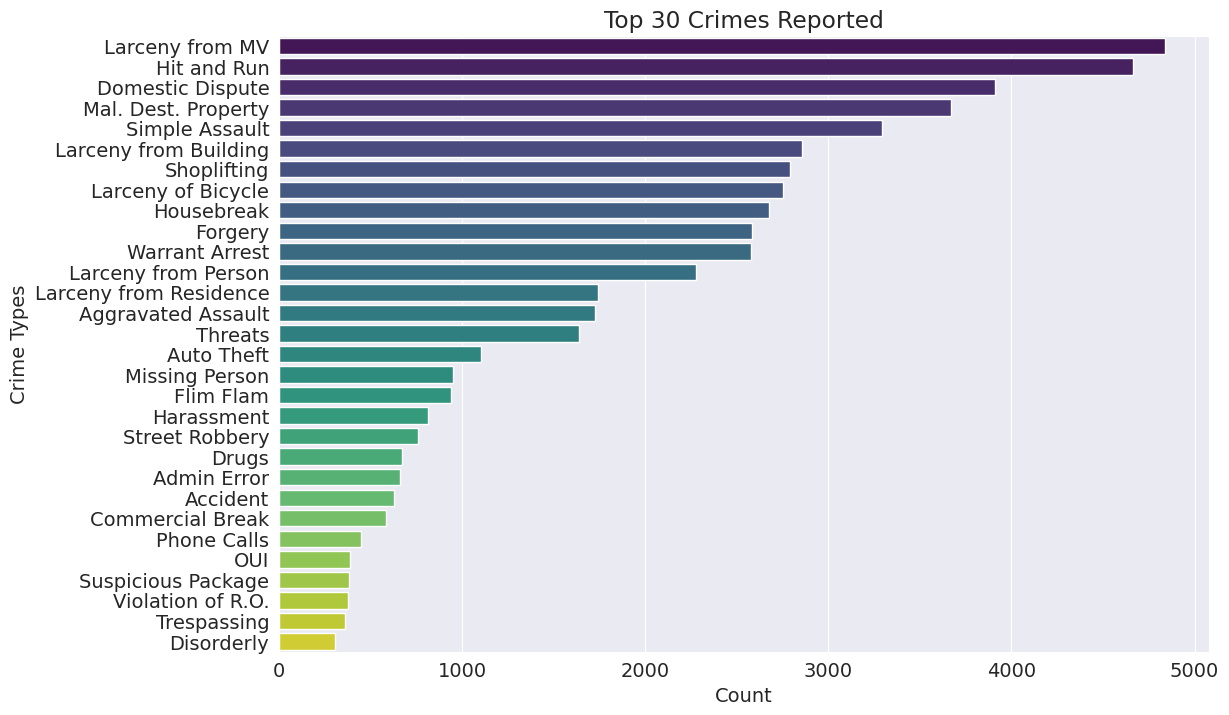

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the crime counts in descending order
crime_count = survey_df['Crime'].value_counts().head(30)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_count.values, y=crime_count.index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Crime Types')
plt.title('Top 30 Crimes Reported')

# Display the plot
plt.show()

As we can see from the plot that most case reported in cambridge were of **(Larcency from MV)** followed by **(Hit and Run)** and **(Domestic dispute)**

***Number of crimes occurred each year from 2009 to 2016***

In [ ]:
DOR=survey_df["Crime Date Time"].copy()
years=["2009","2010","2011","2012","2013","2014","2015","2016"]
crime_count=[0,0,0,0,0,0,0,0]
for i in range(0,8):
    for date in DOR:
        if(years[i] in date):
            crime_count[i]+=1;

In [ ]:
crime_count

[5553, 5433, 4839, 3927, 3780, 7366, 7130, 4982]

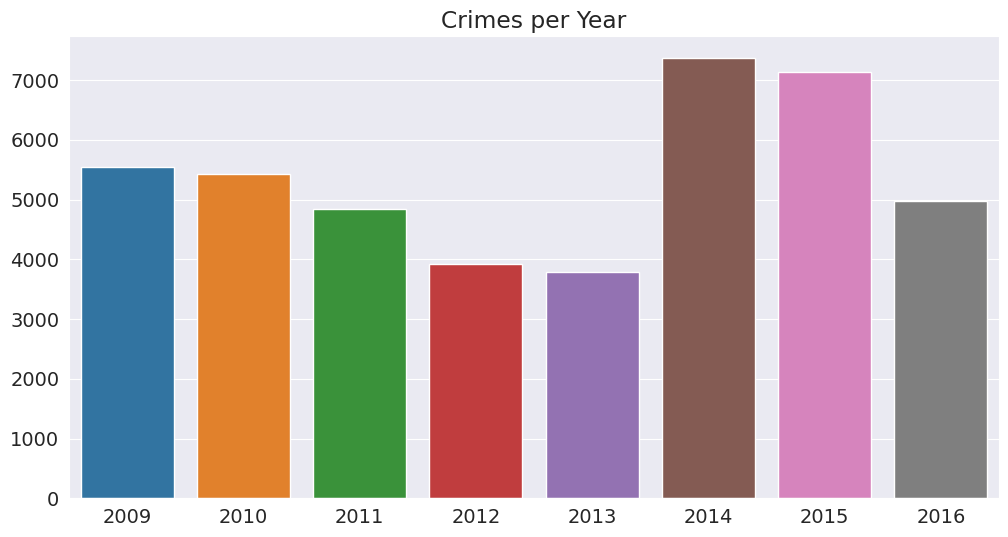

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks()
plt.title("Crimes per Year")
sns.barplot(x=years, y=crime_count);

The Plot shows number of crimes occurred each year from 2009 to 2016.



***Neighbourhood where most Cases are reported***

In [ ]:
survey_df.Neighborhood.nunique()

13

In [ ]:
neighbourhood_report = survey_df.Neighborhood.value_counts()
neighbourhood_report

Cambridgeport       7830
East Cambridge      7691
Area 4              6025
North Cambridge     5602
West Cambridge      5544
Mid-Cambridge       5496
Riverside           5254
Inman/Harrington    4195
Peabody             3522
Agassiz             1520
Highlands           1203
MIT                 1092
Strawberry Hill     1038
Name: Neighborhood, dtype: int64

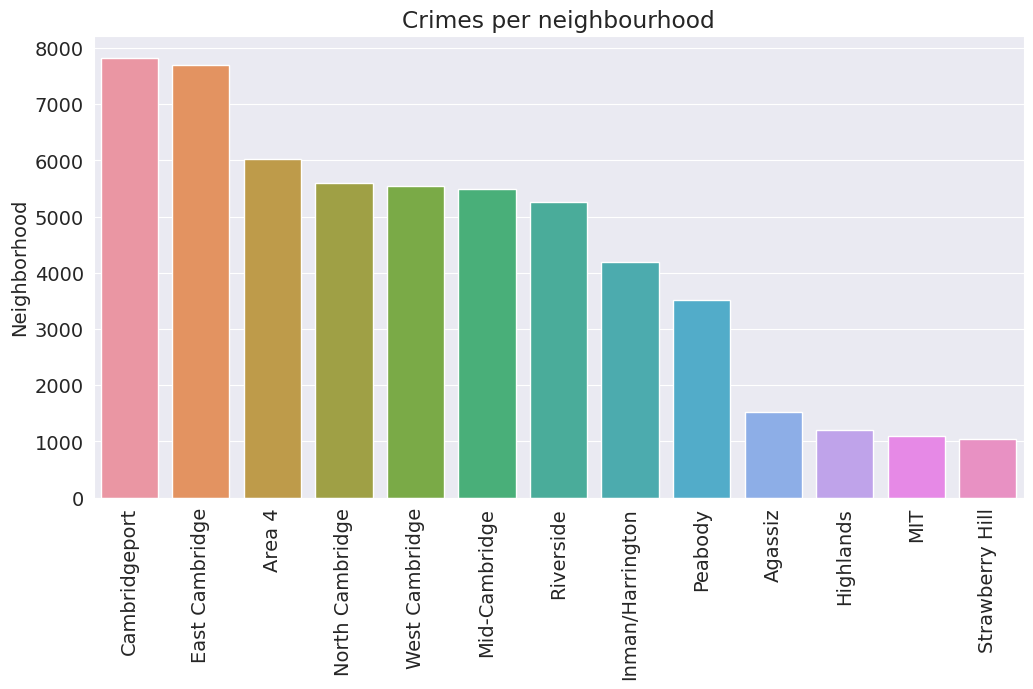

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("Crimes per neighbourhood")
sns.barplot(x=neighbourhood_report.index, y=neighbourhood_report);

The Bar graph above shows that most cases reported in Cambridge are near Cambridgeport with count of 7830 reports, followed by East Cambridge with 7691 reports and Area 4 with 6025 reports.

Hence Cambridgeport is the most crime-prone area in Cambridge and Strawberry hills is the least crime-prone area in Cambridge.



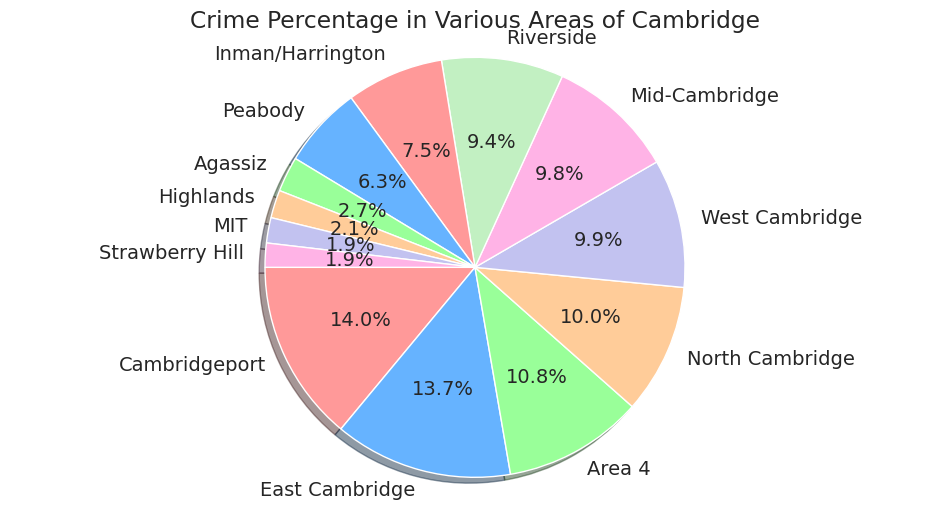

In [ ]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

plt.figure(figsize=(12,6))
plt.title("Crime Percentage in Various Areas of Cambridge")
plt.pie(neighbourhood_report, labels=neighbourhood_report.index, autopct='%1.1f%%', startangle=180, colors=colors, shadow=True)
plt.axis('equal')
plt.show()

From the above pie chart it is clearly depicted that of all the crimes in Cambridge (14% crimes took place at CambridgePort), (13.7% crimes took place East Cambridge) and so on.

***Changes in the number of crimes reported over the years***

In [ ]:
for i in range(0,8):
    print("Year:"+years[i]+"      Crimes Occurred:"+(str)(crime_count[i]))

Year:2009      Crimes Occurred:5553
Year:2010      Crimes Occurred:5433
Year:2011      Crimes Occurred:4839
Year:2012      Crimes Occurred:3927
Year:2013      Crimes Occurred:3780
Year:2014      Crimes Occurred:7366
Year:2015      Crimes Occurred:7130
Year:2016      Crimes Occurred:4982


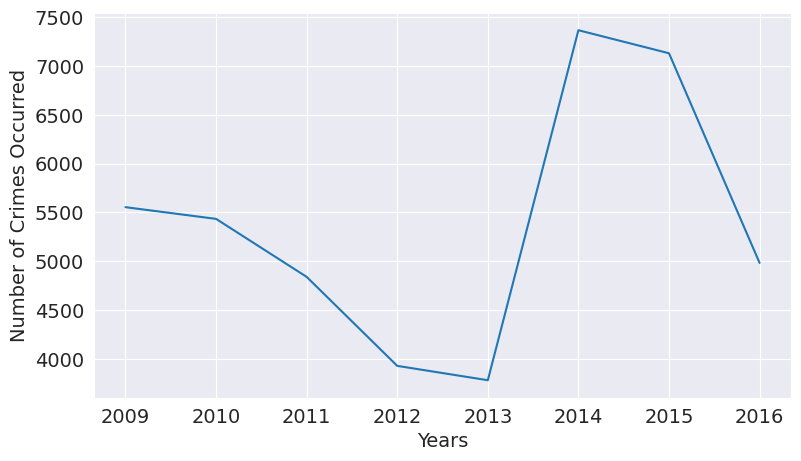

In [ ]:
plt.plot(years,crime_count)
plt.xlabel("Years")
plt.ylabel("Number of Crimes Occurred")
plt.show()

The above graph shows that the graph shows steady decrease till 2013, then there is a sudden rise in 2014 and then exponential decrease till 2016.

***Top 5 areas in Cambridge where most cases were reported***

In [ ]:
Report_Area=survey_df["Reporting Area"].copy()
Report_Area.nunique()

117

In [ ]:
Reports_per_area=Report_Area.value_counts()
Reports_per_area

1002.0    2712
102.0     2555
501.0     2168
105.0     1614
411.0     1489
          ... 
1016.0      35
1304.0      35
1013.0      31
410.0       28
109.0        1
Name: Reporting Area, Length: 117, dtype: int64

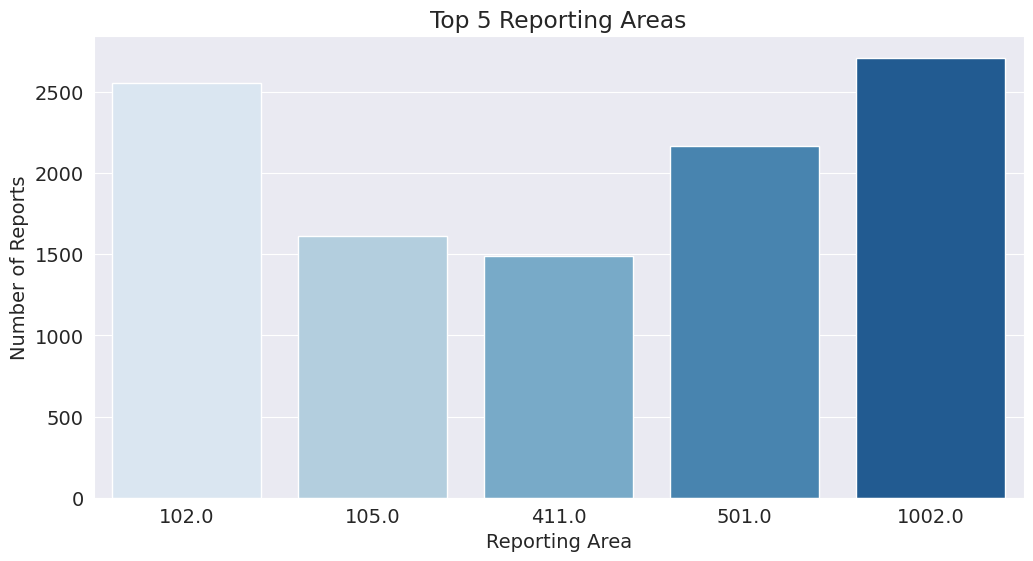

In [ ]:
top_5_areas = Reports_per_area.head(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_areas.index, y=top_5_areas, palette='Blues')  # You can choose a different palette

# Add labels and title
plt.xlabel('Reporting Area')
plt.ylabel('Number of Reports')
plt.title('Top 5 Reporting Areas')

# Display the plot
plt.show()

This shows that the Areas 1002,102,501,105,411 are the area from where majority of reports have been filed from.



##Pre-processing

***Handling Missing Values***

In [ ]:
survey_df = survey_df.dropna(subset=['Location'])
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55931 entries, 0 to 56013
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date of Report   55931 non-null  object 
 1   Crime            55931 non-null  object 
 2   Reporting Area   55929 non-null  float64
 3   Neighborhood     55929 non-null  object 
 4   Location         55931 non-null  object 
 5   Crime Date Time  55931 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.0+ MB


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
survey_df['Reporting Area'] = imputer.fit_transform(survey_df[['Reporting Area']])
survey_df['Neighborhood'] = imputer.fit_transform(survey_df[['Neighborhood']])

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55931 entries, 0 to 56013
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date of Report   55931 non-null  object 
 1   Crime            55931 non-null  object 
 2   Reporting Area   55931 non-null  float64
 3   Neighborhood     55931 non-null  object 
 4   Location         55931 non-null  object 
 5   Crime Date Time  55931 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.0+ MB


***Getting Broader Categories for Classification***

In [ ]:
survey_df['Crime_Category'] = survey_df['Crime']

# Create a dictionary to map specific crime types to broader categories
crime_category_mapping = {
    'Hit and Run': 'Violent Crime',
    'Simple Assault': 'Violent Crime',
    'Aggravated Assault': 'Violent Crime',
    'Street Robbery': 'Violent Crime',
    'Malicious Destruction of Property': 'Property Crime',
    'Larceny from Building': 'Property Crime',
    'Shoplifting': 'Property Crime',
    'Larceny of Bicycle': 'Property Crime',
    'Housebreak': 'Property Crime',
    'Larceny from Person': 'Property Crime',
    'Larceny from Residence': 'Property Crime',
    'Auto Theft': 'Property Crime',
    'Domestic Dispute': 'Non-Violent Crime',
    'Forgery': 'Non-Violent Crime',
    'Warrant Arrest': 'Non-Violent Crime',
    'Threats': 'Non-Violent Crime',
    'Missing Person': 'Non-Violent Crime',
    'Flim Flam': 'Non-Violent Crime',
    'Harassment': 'Non-Violent Crime',
    'Drugs': 'Substance-Related Crime',
    'OUI': 'Substance-Related Crime',
    'Admin Error': 'Other Incidents/Crime',
    'Accident': 'Other Incidents/Crime',
    'Commercial Break': 'Other Incidents/Crime',
    'Phone Calls': 'Other Incidents/Crime',
    'Suspicious Package': 'Other Incidents/Crime',
    'Violation of R.O.': 'Other Incidents/Crime',
    'Disorderly': 'Other Incidents/Crime',
    'Trespassing': 'Other Incidents/Crime',
    'Larceny (Misc)': 'Property Crime',
    'Larceny of Plate': 'Property Crime',
    'Commercial Robbery': 'Property Crime',
    'Rec. Stol. Property': 'Property Crime',
    'Larceny of Services': 'Property Crime',
    'Counterfeiting': 'Property Crime',
    'Embezzlement': 'Property Crime',
    'Arson': 'Property Crime',
    'Taxi Violation': 'Non-Violent Crime',
    'Drinking in Public': 'Non-Violent Crime',
    'Indecent Exposure': 'Non-Violent Crime',
    'Violation of H.O.': 'Non-Violent Crime',
    'Noise Complaint': 'Non-Violent Crime',
    'Peeping & Spying': 'Non-Violent Crime',
    'Extortion/Blackmail': 'Non-Violent Crime',
    'Sex Offender Violation': 'Non-Violent Crime',
    'Stalking': 'Non-Violent Crime',
    'Prostitution': 'Non-Violent Crime',
    'Gambling': 'Non-Violent Crime',
    'Weapon Violations': 'Violent Crime',
    'Kidnapping': 'Violent Crime',
    'Liquor Possession/Sale': 'Substance-Related Crime',
    'Annoying & Accosting': 'Other Incidents/Crime'
}

# Map the specific crime types to their broader categories
survey_df['Crime_Category'] = survey_df['Crime_Category'].map(crime_category_mapping)

In [ ]:
survey_df

,Date of Report,Crime,Reporting Area,Neighborhood,Location,Crime Date Time,Crime_Category
0,01/01/2009 12:39:00 AM,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",1/1/09 0:39,Violent Crime
1,01/01/2009 01:34:00 AM,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",1/1/09 1:34,Violent Crime
2,01/01/2009 01:43:00 AM,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",01/01/2009 02:20 - 02:35,Violent Crime
3,01/01/2009 02:27:00 AM,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",01/01/2009 02:20 - 02:45,Violent Crime
4,01/01/2009 02:34:00 AM,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",01/01/2009 02:15 - 02:35,Other Incidents/Crime
...,...,...,...,...,...,...,...
56009,09/30/2016 04:05:00 PM,Larceny from Residence,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA",09/28/2016 17:00 - 18:00,Property Crime
56010,09/30/2016 05:38:00 PM,Hit and Run,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA",09/30/2016 16:30 - 17:38,Violent Crime
56011,09/30/2016 06:52:00 PM,Harassment,702.0,Riverside,"0 Soden St, Cambridge, MA",09/16/2016 18:52 - 09/30/2016 18:52,Non-Violent Crime
56012,09/30/2016 07:52:00 PM,Hit and Run,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA",09/30/2016 19:51,Violent Crime


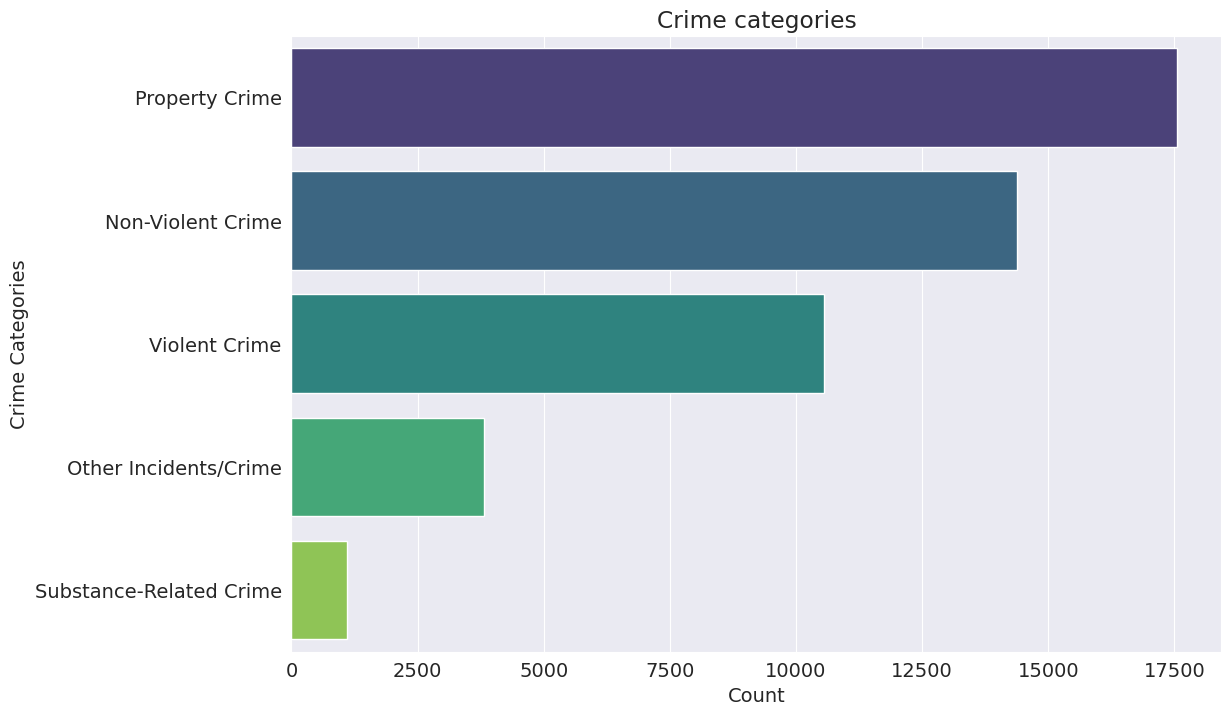

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the crime counts in descending order
crime_count = survey_df['Crime_Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_count.values, y=crime_count.index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Crime Categories')
plt.title('Crime categories')

# Display the plot
plt.show()

In [ ]:
survey_df = survey_df.drop('Crime', axis=1)

In [ ]:
survey_df

,Date of Report,Reporting Area,Neighborhood,Location,Crime Date Time,Crime_Category
0,01/01/2009 12:39:00 AM,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",1/1/09 0:39,Violent Crime
1,01/01/2009 01:34:00 AM,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",1/1/09 1:34,Violent Crime
2,01/01/2009 01:43:00 AM,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",01/01/2009 02:20 - 02:35,Violent Crime
3,01/01/2009 02:27:00 AM,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",01/01/2009 02:20 - 02:45,Violent Crime
4,01/01/2009 02:34:00 AM,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",01/01/2009 02:15 - 02:35,Other Incidents/Crime
...,...,...,...,...,...,...
56009,09/30/2016 04:05:00 PM,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA",09/28/2016 17:00 - 18:00,Property Crime
56010,09/30/2016 05:38:00 PM,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA",09/30/2016 16:30 - 17:38,Violent Crime
56011,09/30/2016 06:52:00 PM,702.0,Riverside,"0 Soden St, Cambridge, MA",09/16/2016 18:52 - 09/30/2016 18:52,Non-Violent Crime
56012,09/30/2016 07:52:00 PM,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA",09/30/2016 19:51,Violent Crime


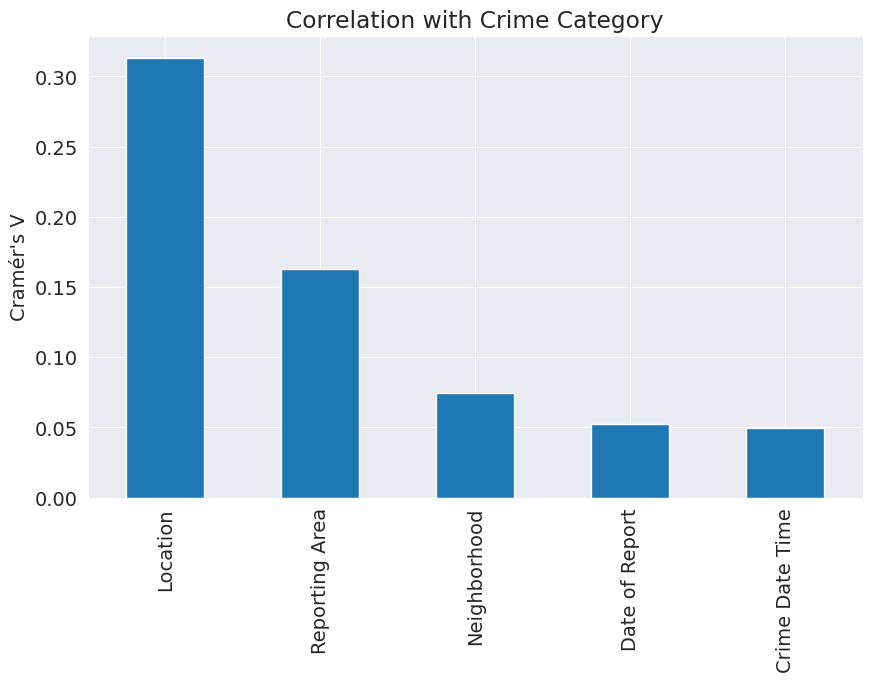

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Assuming df is your DataFrame and 'Target' is your target column
cols = survey_df.columns.drop('Crime_Category') # Exclude the target column from the features
correlations = {}

for col in cols:
    corr = cramers_v(df[col], survey_df['Crime_Category'])  # Compute correlation with the target
    correlations[col] = corr

# Convert to a Series for easy plotting
corr_series = pd.Series(correlations)

# Sort the values for better visualization
corr_series = corr_series.sort_values(ascending=False)

# Visualize the correlations
plt.figure(figsize=(10, 6))
corr_series.plot(kind='bar')
plt.title('Correlation with Crime Category')
plt.ylabel('Cramér\'s V')
plt.show()

In [ ]:
safe = survey_df
safe

,Date of Report,Reporting Area,Neighborhood,Location,Crime Date Time,Crime_Category
0,01/01/2009 12:39:00 AM,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",1/1/09 0:39,Violent Crime
1,01/01/2009 01:34:00 AM,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",1/1/09 1:34,Violent Crime
2,01/01/2009 01:43:00 AM,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",01/01/2009 02:20 - 02:35,Violent Crime
3,01/01/2009 02:27:00 AM,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",01/01/2009 02:20 - 02:45,Violent Crime
4,01/01/2009 02:34:00 AM,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",01/01/2009 02:15 - 02:35,Other Incidents/Crime
...,...,...,...,...,...,...
56009,09/30/2016 04:05:00 PM,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA",09/28/2016 17:00 - 18:00,Property Crime
56010,09/30/2016 05:38:00 PM,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA",09/30/2016 16:30 - 17:38,Violent Crime
56011,09/30/2016 06:52:00 PM,702.0,Riverside,"0 Soden St, Cambridge, MA",09/16/2016 18:52 - 09/30/2016 18:52,Non-Violent Crime
56012,09/30/2016 07:52:00 PM,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA",09/30/2016 19:51,Violent Crime


In [ ]:
#load_again
survey_df = safe

In [ ]:
survey_df

,Date of Report,Reporting Area,Neighborhood,Location,Crime Date Time,Crime_Category
0,01/01/2009 12:39:00 AM,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",1/1/09 0:39,4
1,01/01/2009 01:34:00 AM,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",1/1/09 1:34,4
2,01/01/2009 01:43:00 AM,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",01/01/2009 02:20 - 02:35,4
3,01/01/2009 02:27:00 AM,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",01/01/2009 02:20 - 02:45,4
4,01/01/2009 02:34:00 AM,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",01/01/2009 02:15 - 02:35,1
...,...,...,...,...,...,...
56009,09/30/2016 04:05:00 PM,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA",09/28/2016 17:00 - 18:00,2
56010,09/30/2016 05:38:00 PM,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA",09/30/2016 16:30 - 17:38,4
56011,09/30/2016 06:52:00 PM,702.0,Riverside,"0 Soden St, Cambridge, MA",09/16/2016 18:52 - 09/30/2016 18:52,0
56012,09/30/2016 07:52:00 PM,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA",09/30/2016 19:51,4


***Convert Categorical Data***

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

# Label Encoding for 'Crime_Category' column
crime_encoder = LabelEncoder()
survey_df['Crime_Category'] = crime_encoder.fit_transform(survey_df['Crime_Category'])

survey_df

,Date of Report,Reporting Area,Neighborhood,Location,Crime Date Time,Crime_Category
0,01/01/2009 12:39:00 AM,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",1/1/09 0:39,4
1,01/01/2009 01:34:00 AM,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",1/1/09 1:34,4
2,01/01/2009 01:43:00 AM,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",01/01/2009 02:20 - 02:35,4
3,01/01/2009 02:27:00 AM,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",01/01/2009 02:20 - 02:45,4
4,01/01/2009 02:34:00 AM,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",01/01/2009 02:15 - 02:35,1
...,...,...,...,...,...,...
56009,09/30/2016 04:05:00 PM,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA",09/28/2016 17:00 - 18:00,2
56010,09/30/2016 05:38:00 PM,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA",09/30/2016 16:30 - 17:38,4
56011,09/30/2016 06:52:00 PM,702.0,Riverside,"0 Soden St, Cambridge, MA",09/16/2016 18:52 - 09/30/2016 18:52,0
56012,09/30/2016 07:52:00 PM,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA",09/30/2016 19:51,4


In [ ]:
# Target Encoding for 'Reporting Area'
target_encoder = TargetEncoder()
survey_df['Reporting Area'] = target_encoder.fit_transform(survey_df['Reporting Area'], survey_df['Crime_Category'])

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55931 entries, 0 to 56013
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date of Report   55931 non-null  object 
 1   Reporting Area   55931 non-null  float64
 2   Neighborhood     55931 non-null  object 
 3   Location         55931 non-null  object 
 4   Crime Date Time  55931 non-null  object 
 5   Crime_Category   55931 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


In [ ]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Neighborhood' column
survey_df['Neighborhood'] = label_encoder.fit_transform(survey_df['Neighborhood'])

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55931 entries, 0 to 56013
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date of Report   55931 non-null  object 
 1   Reporting Area   55931 non-null  float64
 2   Neighborhood     55931 non-null  int64  
 3   Location         55931 non-null  object 
 4   Crime Date Time  55931 non-null  object 
 5   Crime_Category   55931 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.0+ MB


***Convert to Datetime***

In [ ]:
survey_df['Date of Report'] = pd.to_datetime(survey_df['Date of Report'])

In [ ]:
def parse_crime_date(crime_date_str):
    # Split if there is a range and take the start
    if '-' in crime_date_str:
        crime_date_str = crime_date_str.split('-')[0].strip()
    return pd.to_datetime(crime_date_str, errors='coerce')

In [ ]:
# Apply function to parse 'Crime Date Time'
survey_df['Crime Date Time'] = survey_df['Crime Date Time'].apply(parse_crime_date)

In [ ]:
survey_df

,Date of Report,Reporting Area,Neighborhood,Location,Crime Date Time,Crime_Category
0,2009-01-01 00:39:00,2.080114,2,"400 Massachusetts Avenue, Cambridge, MA",2009-01-01 00:39:00,4
1,2009-01-01 01:34:00,2.254795,7,"200 HAMPSHIRE STREET, Cambridge, MA",2009-01-01 01:34:00,4
2,2009-01-01 01:43:00,2.245492,10,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",2009-01-01 02:20:00,4
3,2009-01-01 02:27:00,2.218905,3,"100 SCIARAPPA STREET, Cambridge, MA",2009-01-01 02:20:00,4
4,2009-01-01 02:34:00,2.245492,10,"1200 Massachusetts Avenue, Cambridge, MA",2009-01-01 02:15:00,1
...,...,...,...,...,...,...
56009,2016-09-30 16:05:00,2.210000,2,"0 FAIRMONT AVE, Cambridge, MA",2016-09-28 17:00:00,2
56010,2016-09-30 17:38:00,2.391489,8,"2000 MASSACHUSETTS AVE, Cambridge, MA",2016-09-30 16:30:00,4
56011,2016-09-30 18:52:00,2.452071,10,"0 Soden St, Cambridge, MA",2016-09-16 18:52:00,0
56012,2016-09-30 19:52:00,2.157390,12,"University Rd & Mount Auburn St, Cambridge, MA",2016-09-30 19:51:00,4


***Handling DateTime***

In [ ]:
# Extract components
survey_df['Year_Report'] = survey_df['Date of Report'].dt.year
survey_df['Month_Report'] = survey_df['Date of Report'].dt.month
survey_df['Day_Report'] = survey_df['Date of Report'].dt.day
survey_df['Hour_Report'] = survey_df['Date of Report'].dt.hour

In [ ]:
# Extract components
survey_df['Year_Crime'] = survey_df['Crime Date Time'].dt.year
survey_df['Month_Crime'] = survey_df['Crime Date Time'].dt.month
survey_df['Day_Crime'] = survey_df['Crime Date Time'].dt.day
survey_df['Hour_Crime'] = survey_df['Crime Date Time'].dt.hour

# Calculate the time difference in hours
survey_df['Time_Difference_Hours'] = (survey_df['Date of Report'] - survey_df['Crime Date Time']).dt.total_seconds() / 3600
survey_df

,Date of Report,Reporting Area,Neighborhood,Location,Crime Date Time,Crime_Category,Year_Report,Month_Report,Day_Report,Hour_Report,Year_Crime,Month_Crime,Day_Crime,Hour_Crime,Time_Difference_Hours
0,2009-01-01 00:39:00,2.080114,2,"400 Massachusetts Avenue, Cambridge, MA",2009-01-01 00:39:00,4,2009,1,1,0,2009,1,1,0,0.000000
1,2009-01-01 01:34:00,2.254795,7,"200 HAMPSHIRE STREET, Cambridge, MA",2009-01-01 01:34:00,4,2009,1,1,1,2009,1,1,1,0.000000
2,2009-01-01 01:43:00,2.245492,10,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",2009-01-01 02:20:00,4,2009,1,1,1,2009,1,1,2,-0.616667
3,2009-01-01 02:27:00,2.218905,3,"100 SCIARAPPA STREET, Cambridge, MA",2009-01-01 02:20:00,4,2009,1,1,2,2009,1,1,2,0.116667
4,2009-01-01 02:34:00,2.245492,10,"1200 Massachusetts Avenue, Cambridge, MA",2009-01-01 02:15:00,1,2009,1,1,2,2009,1,1,2,0.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56009,2016-09-30 16:05:00,2.210000,2,"0 FAIRMONT AVE, Cambridge, MA",2016-09-28 17:00:00,2,2016,9,30,16,2016,9,28,17,47.083333
56010,2016-09-30 17:38:00,2.391489,8,"2000 MASSACHUSETTS AVE, Cambridge, MA",2016-09-30 16:30:00,4,2016,9,30,17,2016,9,30,16,1.133333
56011,2016-09-30 18:52:00,2.452071,10,"0 Soden St, Cambridge, MA",2016-09-16 18:52:00,0,2016,9,30,18,2016,9,16,18,336.000000
56012,2016-09-30 19:52:00,2.157390,12,"University Rd & Mount Auburn St, Cambridge, MA",2016-09-30 19:51:00,4,2016,9,30,19,2016,9,30,19,0.016667


In [ ]:
survey_df=survey_df.drop("Date of Report", axis=1)
survey_df

,Reporting Area,Neighborhood,Location,Crime Date Time,Crime_Category,Year_Report,Month_Report,Day_Report,Hour_Report,Year_Crime,Month_Crime,Day_Crime,Hour_Crime,Time_Difference_Hours
0,2.080114,2,"400 Massachusetts Avenue, Cambridge, MA",2009-01-01 00:39:00,4,2009,1,1,0,2009,1,1,0,0.000000
1,2.254795,7,"200 HAMPSHIRE STREET, Cambridge, MA",2009-01-01 01:34:00,4,2009,1,1,1,2009,1,1,1,0.000000
2,2.245492,10,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",2009-01-01 02:20:00,4,2009,1,1,1,2009,1,1,2,-0.616667
3,2.218905,3,"100 SCIARAPPA STREET, Cambridge, MA",2009-01-01 02:20:00,4,2009,1,1,2,2009,1,1,2,0.116667
4,2.245492,10,"1200 Massachusetts Avenue, Cambridge, MA",2009-01-01 02:15:00,1,2009,1,1,2,2009,1,1,2,0.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56009,2.210000,2,"0 FAIRMONT AVE, Cambridge, MA",2016-09-28 17:00:00,2,2016,9,30,16,2016,9,28,17,47.083333
56010,2.391489,8,"2000 MASSACHUSETTS AVE, Cambridge, MA",2016-09-30 16:30:00,4,2016,9,30,17,2016,9,30,16,1.133333
56011,2.452071,10,"0 Soden St, Cambridge, MA",2016-09-16 18:52:00,0,2016,9,30,18,2016,9,16,18,336.000000
56012,2.157390,12,"University Rd & Mount Auburn St, Cambridge, MA",2016-09-30 19:51:00,4,2016,9,30,19,2016,9,30,19,0.016667


In [ ]:
survey_df=survey_df.drop("Crime Date Time", axis=1)
survey_df

,Reporting Area,Neighborhood,Location,Crime_Category,Year_Report,Month_Report,Day_Report,Hour_Report,Year_Crime,Month_Crime,Day_Crime,Hour_Crime,Time_Difference_Hours
0,2.080114,2,"400 Massachusetts Avenue, Cambridge, MA",4,2009,1,1,0,2009,1,1,0,0.000000
1,2.254795,7,"200 HAMPSHIRE STREET, Cambridge, MA",4,2009,1,1,1,2009,1,1,1,0.000000
2,2.245492,10,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",4,2009,1,1,1,2009,1,1,2,-0.616667
3,2.218905,3,"100 SCIARAPPA STREET, Cambridge, MA",4,2009,1,1,2,2009,1,1,2,0.116667
4,2.245492,10,"1200 Massachusetts Avenue, Cambridge, MA",1,2009,1,1,2,2009,1,1,2,0.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56009,2.210000,2,"0 FAIRMONT AVE, Cambridge, MA",2,2016,9,30,16,2016,9,28,17,47.083333
56010,2.391489,8,"2000 MASSACHUSETTS AVE, Cambridge, MA",4,2016,9,30,17,2016,9,30,16,1.133333
56011,2.452071,10,"0 Soden St, Cambridge, MA",0,2016,9,30,18,2016,9,16,18,336.000000
56012,2.157390,12,"University Rd & Mount Auburn St, Cambridge, MA",4,2016,9,30,19,2016,9,30,19,0.016667


***Handling Location***

In [ ]:
# Function to remove ", Cambridge, MA"
def remove_suffix(location):
    suffix = ", Cambridge, MA"
    if location.endswith(suffix):
        return location[:-len(suffix)]
    return location

In [ ]:
# Apply the function to the Location column
survey_df['Location'] = survey_df['Location'].apply(remove_suffix)

In [ ]:
survey_df['Location']

0                    400 Massachusetts Avenue
1                        200 HAMPSHIRE STREET
2        DUNSTER STREET & MOUNT AUBURN STREET
3                        100 SCIARAPPA STREET
4                   1200 Massachusetts Avenue
                         ...                 
56009                          0 FAIRMONT AVE
56010                  2000 MASSACHUSETTS AVE
56011                              0 Soden St
56012         University Rd & Mount Auburn St
56013                     BRATTLE ST & JFK ST
Name: Location, Length: 55931, dtype: object

In [ ]:
import re
# Function to remove numerical prefixes
def remove_numerical_prefix(location):
    return re.sub(r'^\d+\s+', '', location)

In [ ]:
# Apply the function to the Location column
survey_df['Location'] = survey_df['Location'].apply(remove_numerical_prefix)

In [ ]:
survey_df['Location']

0                        Massachusetts Avenue
1                            HAMPSHIRE STREET
2        DUNSTER STREET & MOUNT AUBURN STREET
3                            SCIARAPPA STREET
4                        Massachusetts Avenue
                         ...                 
56009                            FAIRMONT AVE
56010                       MASSACHUSETTS AVE
56011                                Soden St
56012         University Rd & Mount Auburn St
56013                     BRATTLE ST & JFK ST
Name: Location, Length: 55931, dtype: object

In [ ]:
# Convert the 'Location' column to lowercase
survey_df['Location'] = survey_df['Location'].str.lower()

In [ ]:
survey_df['Location']

0                        massachusetts avenue
1                            hampshire street
2        dunster street & mount auburn street
3                            sciarappa street
4                        massachusetts avenue
                         ...                 
56009                            fairmont ave
56010                       massachusetts ave
56011                                soden st
56012         university rd & mount auburn st
56013                     brattle st & jfk st
Name: Location, Length: 55931, dtype: object

In [ ]:
survey_df.Location.nunique()

3785

In [ ]:
location_count = survey_df.Location.value_counts().head(50)
location_count

massachusetts avenue       4256
massachusetts ave          2388
cambridgeside place        1511
cambridge street           1210
broadway                   1064
cambridgeside pl            771
alewife brook pky           681
cambridge st                631
mount auburn street         586
memorial drive              551
harvard street              520
rindge avenue               520
brattle street              475
white street                418
jfk street                  361
prospect street             345
concord avenue              329
columbia street             325
mount auburn st             310
sixth street                297
brattle st                  286
rindge ave                  284
river street                281
harvard st                  269
memorial dr                 268
franklin street             265
putnam avenue               262
cambridge center            253
garden street               242
white st                    240
putnam gdns                 232
jfk st  

In [ ]:
# List of common terms to exclude
exclusions = ['avenue', 'ave', 'street', 'st', 'center', 'place', 'pky', 'dr', 'road', 'rd', 'boulevard', 'blvd', 'pl', 'gnds', 'court', 'squareuare', 'ive', 'sq', 'sqaure', 'uare', 'hill']

# Function to clean location name by removing common terms
def clean_location(location):
    for term in exclusions:
        location = location.replace(term, '')
    return location.strip()

# Apply the function to the Location column
survey_df['Cleaned_Location'] = survey_df['Location'].apply(clean_location)

In [ ]:
def primary_location(location):
    return location.split('&')[0].strip()

# Apply the function to the Location column
survey_df['Cleaned_Location'] = survey_df['Cleaned_Location'].apply(primary_location)

In [ ]:
survey_df.Cleaned_Location.nunique()

734

In [ ]:
location_count = survey_df.Cleaned_Location.value_counts()[0:50]
location_count

massachusetts    7654
cambridge        2640
cambridgeside    2294
bway             1429
brattle          1072
mount auburn      987
harva             984
memorial          855
rindge            831
alewife brook     710
jfk               694
white             660
gaen              589
columbia          570
brookline         533
conco             529
prospect          521
franklin          517
bishop allen      500
walden            483
sixth             475
green             470
main              468
putnam            442
magazine          411
windsor           408
rr                398
albany            391
church            391
hampshire         380
thi               367
pearl             334
norfolk           328
elm               306
easant            304
sidney            300
gore              287
huron             279
washington        278
weern             275
jackson           248
fir               244
spring            240
putnam gdns       235
cambridgepark     231
thorndike 

In [ ]:
target_encoded = survey_df #for naive bayes

In [ ]:
from category_encoders import TargetEncoder

In [ ]:
encoder = TargetEncoder()

# Apply target encoding
target_encoded['Cleaned_Location'] = encoder.fit_transform(target_encoded['Cleaned_Location'], target_encoded['Crime_Category'])

In [ ]:
count_encoder = survey_df # for decision tree

In [ ]:
from collections import Counter

In [ ]:
# Count the frequency of each category
location_counts = Counter(count_encoder['Cleaned_Location'])
# Replace each categorical value with its frequency
count_encoder['Cleaned_Location'] = count_encoder['Cleaned_Location'].apply(lambda x: location_counts[x])

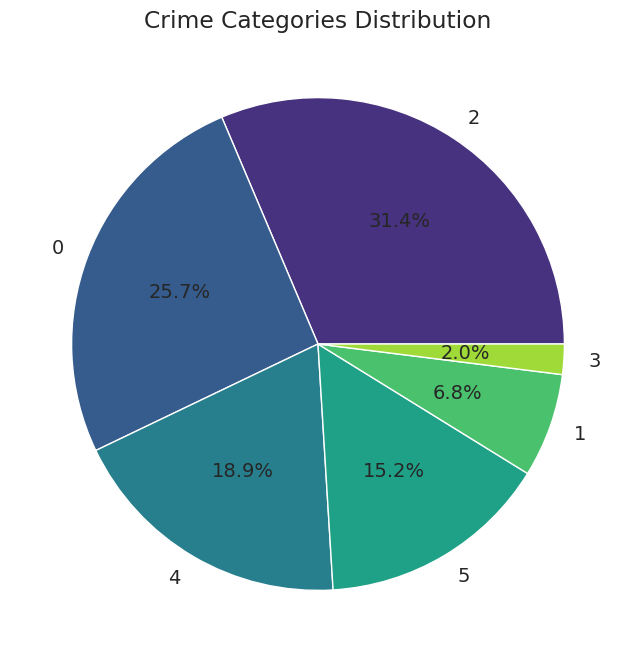

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the crime counts in descending order
crime_count = survey_df['Crime_Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(crime_count, labels=crime_count.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(crime_count)))

# Add a title
plt.title('Crime Categories Distribution')

# Display the plot
plt.show()

In [ ]:
target_encoded = target_encoded.drop('Location', axis=1)

In [ ]:
target_encoded

,Reporting Area,Neighborhood,Crime_Category,Year_Report,Month_Report,Day_Report,Hour_Report,Year_Crime,Month_Crime,Day_Crime,Hour_Crime,Time_Difference_Hours,Cleaned_Location
0,2.080114,2,4,2009,1,1,0,2009,1,1,0,0.000000,7654
1,2.254795,7,4,2009,1,1,1,2009,1,1,1,0.000000,380
2,2.245492,10,4,2009,1,1,1,2009,1,1,2,-0.616667,166
3,2.218905,3,4,2009,1,1,2,2009,1,1,2,0.116667,135
4,2.245492,10,1,2009,1,1,2,2009,1,1,2,0.316667,7654
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56009,2.210000,2,2,2016,9,30,16,2016,9,28,17,47.083333,140
56010,2.391489,8,4,2016,9,30,17,2016,9,30,16,1.133333,7654
56011,2.452071,10,0,2016,9,30,18,2016,9,16,18,336.000000,31
56012,2.157390,12,4,2016,9,30,19,2016,9,30,19,0.016667,34


In [ ]:
count_encoder = count_encoder.drop('Location', axis=1)

In [ ]:
count_encoder

,Reporting Area,Neighborhood,Crime_Category,Year_Report,Month_Report,Day_Report,Hour_Report,Year_Crime,Month_Crime,Day_Crime,Hour_Crime,Time_Difference_Hours,Cleaned_Location
0,2.080114,2,4,2009,1,1,0,2009,1,1,0,0.000000,7654
1,2.254795,7,4,2009,1,1,1,2009,1,1,1,0.000000,380
2,2.245492,10,4,2009,1,1,1,2009,1,1,2,-0.616667,166
3,2.218905,3,4,2009,1,1,2,2009,1,1,2,0.116667,135
4,2.245492,10,1,2009,1,1,2,2009,1,1,2,0.316667,7654
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56009,2.210000,2,2,2016,9,30,16,2016,9,28,17,47.083333,140
56010,2.391489,8,4,2016,9,30,17,2016,9,30,16,1.133333,7654
56011,2.452071,10,0,2016,9,30,18,2016,9,16,18,336.000000,31
56012,2.157390,12,4,2016,9,30,19,2016,9,30,19,0.016667,34


***Splitting the Dataset***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_te = target_encoded.drop('Crime_Category', axis=1)
y_te = target_encoded['Crime_Category']

In [ ]:
#Handle Imbalance Data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_te, y_te)

y_sm.value_counts()

4    17554
1    17554
0    17554
5    17554
2    17554
3    17554
Name: Crime_Category, dtype: int64

In [ ]:
X_ce = count_encoder.drop('Crime_Category', axis=1)
y_ce = count_encoder['Crime_Category']

In [ ]:
X_train_te, X_temp, y_train_te, y_temp = train_test_split(X_te, y_te, test_size=0.2, random_state=42)
X_val_te, X_test_te, y_val_te, y_test_te = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train_ce, X_temp, y_train_ce, y_temp = train_test_split(X_ce, y_ce, test_size=0.2, random_state=42)
X_val_ce, X_test_ce, y_val_ce, y_test_ce = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Printing the shapes
print("Shape of X_train:", X_train_te.shape)
print("Shape of y_train:", y_train_te.shape)
print("Shape of X_val:", X_val_te.shape)
print("Shape of y_val:", y_val_te.shape)
print("Shape of X_test:", X_test_te.shape)
print("Shape of y_test:", y_test_te.shape)

Shape of X_train: (44744, 12)
Shape of y_train: (44744,)
Shape of X_val: (5593, 12)
Shape of y_val: (5593,)
Shape of X_test: (5594, 12)
Shape of y_test: (5594,)


In [ ]:
# Printing the shapes
print("Shape of X_train:", X_train_ce.shape)
print("Shape of y_train:", y_train_ce.shape)
print("Shape of X_val:", X_val_ce.shape)
print("Shape of y_val:", y_val_ce.shape)
print("Shape of X_test:", X_test_ce.shape)
print("Shape of y_test:", y_test_ce.shape)

Shape of X_train: (44744, 12)
Shape of y_train: (44744,)
Shape of X_val: (5593, 12)
Shape of y_val: (5593,)
Shape of X_test: (5594, 12)
Shape of y_test: (5594,)


In [ ]:
X_train_ce

,Reporting Area,Neighborhood,Year_Report,Month_Report,Day_Report,Hour_Report,Year_Crime,Month_Crime,Day_Crime,Hour_Crime,Time_Difference_Hours,Cleaned_Location
49381,2.267767,5,2015,10,7,7,2015,10,7,7,0.000000,144
19939,2.244259,1,2011,8,30,11,2011,8,30,10,0.366667,521
18804,2.157390,12,2011,7,11,16,2011,7,11,16,0.016667,1072
29893,2.417709,2,2013,1,13,20,2013,1,13,20,0.050000,920
35086,2.218905,3,2013,10,7,18,2013,10,1,18,144.016667,143
...,...,...,...,...,...,...,...,...,...,...,...,...
44771,2.057196,2,2015,2,21,13,2015,2,20,10,27.333333,7654
54422,2.318182,3,2016,7,10,12,2016,7,10,12,0.016667,143
38168,2.690813,9,2014,4,5,13,2014,4,4,18,18.600000,61
860,2.080114,2,2009,2,15,13,2009,2,15,13,0.000000,470


In [ ]:
from sklearn.preprocessing import StandardScaler # for svm

scaler = StandardScaler()
X_train_te_sc = scaler.fit_transform(X_train_te)
X_val_te_sc = scaler.transform(X_val_te)
X_test_te_sc = scaler.transform(X_test_te)

In [ ]:
X_train_locdrop = X_train_te.drop('Cleaned_Location', axis=1)
X_val_locdrop = X_val_te.drop('Cleaned_Location', axis=1)
X_test_locdrop = X_test_te.drop('Cleaned_Location', axis=1)

##Model Training

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
def evaluate_model(y_true, y_pred, y_prob=None, average='weighted'):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f1 = f1_score(y_true, y_pred, average=average)
    confusion = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, auc_roc, confusion

***Naive Bayesian Classifier***

In [ ]:
bayesian_classifier = GaussianNB()
bayesian_classifier.fit(X_train_te, y_train_te)

# Predictions
bayesian_preds = bayesian_classifier.predict(X_val_te)

In [ ]:
bayesian_metrics = evaluate_model(y_val_te, bayesian_preds)

In [ ]:
# Report metrics
print("Bayesian Classifier Metrics:")
print(f"Accuracy: {bayesian_metrics[0]}")
print(f"Precision: {bayesian_metrics[1]}")
print(f"Recall: {bayesian_metrics[2]}")
print(f"F1-Score: {bayesian_metrics[3]}")
print("Confusion Matrix:")
print(bayesian_metrics[5])

Bayesian Classifier Metrics:
Accuracy: 0.28642946540318254
Precision: 0.34643585037776187
Recall: 0.28642946540318254
F1-Score: 0.23311548118661388
Confusion Matrix:
[[  35  184  816   42  111  250]
 [   2   81  190   17   32   51]
 [  18  217 1026   21   90  349]
 [   1   13   58    9   10   20]
 [   6  120  603   47  101  237]
 [   1   79  321   12   73  350]]


In [ ]:
# Get probability predictions for each class
nb_probs = bayesian_classifier.predict_proba(X_val_te)

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score
# The 'average' parameter determines the type of averaging performed on the data:
# 'macro' (default) gives equal weight to each class, while 'weighted' accounts for class imbalance.
auc_roc = roc_auc_score(y_val_te, nb_probs, multi_class='ovr', average='macro')

In [ ]:
# Output the AUC ROC score
print(f"ROC AUC Score: {auc_roc}")

ROC AUC Score: 0.6017136628284993


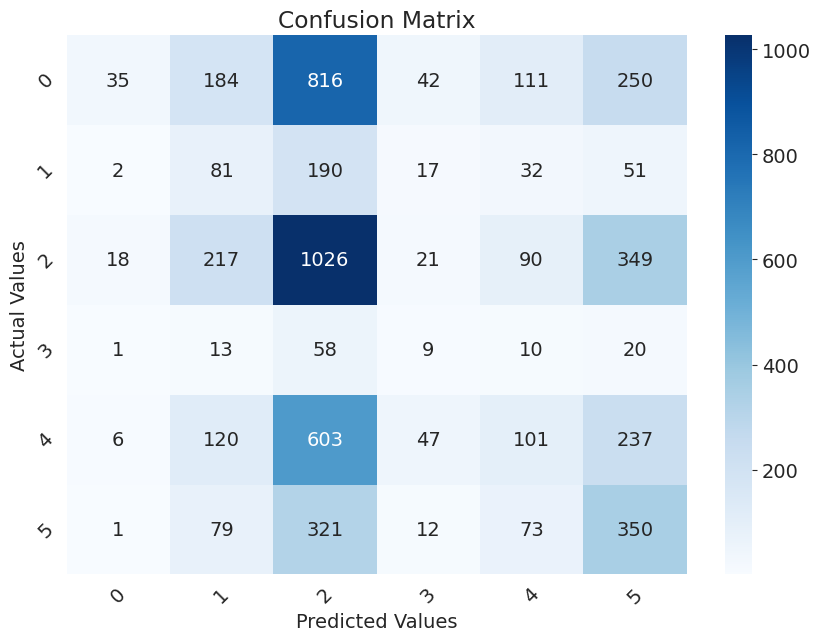

In [ ]:
cm = bayesian_metrics[5]
# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

# Adjust label size
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

***Decision Tree Classifier***

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_ce, y_train_ce)

# Predictions
decision_tree_preds = decision_tree_classifier.predict(X_val_ce)

In [ ]:
decision_tree_metrics = evaluate_model(y_val_ce, decision_tree_preds)

In [ ]:
print("\nDecision Tree Classifier Metrics:")
print(f"Accuracy: {decision_tree_metrics[0]}")
print(f"Precision: {decision_tree_metrics[1]}")
print(f"Recall: {decision_tree_metrics[2]}")
print(f"F1-Score: {decision_tree_metrics[3]}")
print("Confusion Matrix:")
print(decision_tree_metrics[5])


Decision Tree Classifier Metrics:
Accuracy: 0.3506168424816735
Precision: 0.3520752412656062
Recall: 0.3506168424816735
F1-Score: 0.3512547944525942
Confusion Matrix:
[[553 109 328  36 280 132]
 [109  57  77  10  88  32]
 [330  88 756  20 260 267]
 [ 25  11  21  11  35   8]
 [307  77 264  39 283 144]
 [119  40 232  14 130 301]]


In [ ]:
# Get probability predictions for each class
decision_tree_probs = decision_tree_classifier.predict_proba(X_val_ce)

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score
# The 'average' parameter determines the type of averaging performed on the data:
# 'macro' (default) gives equal weight to each class, while 'weighted' accounts for class imbalance.
auc_roc = roc_auc_score(y_val_ce, decision_tree_probs, multi_class='ovr', average='macro')

In [ ]:
# Output the AUC ROC score
print(f"ROC AUC Score: {auc_roc}")

ROC AUC Score: 0.571113518865729


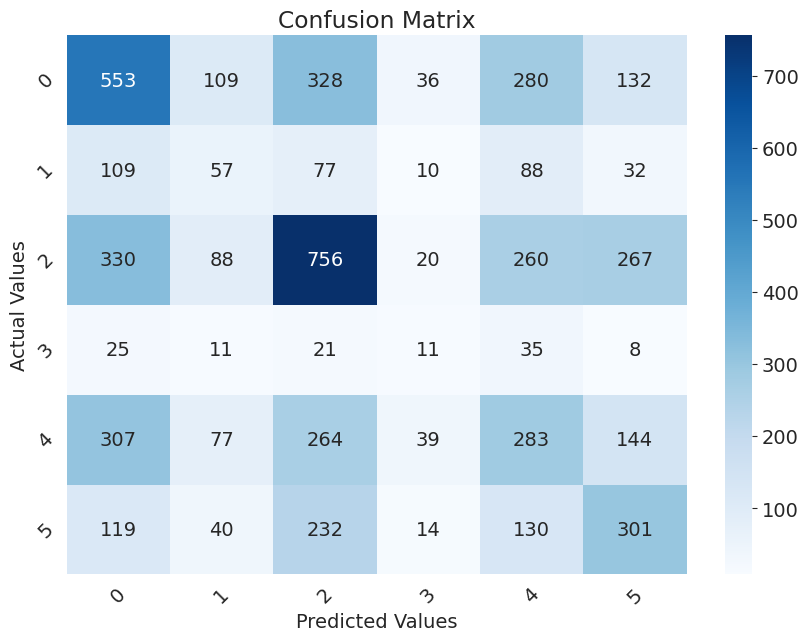

In [ ]:
cm = decision_tree_metrics[5]
# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

# Adjust label size
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

***SVM Classifier***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model2(y_true, y_pred, y_prob=None, average='weighted'):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average, zero_division=0)
    recall = recall_score(y_true, y_pred, average=average, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average, zero_division=0)

    confusion = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, confusion


In [ ]:
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_te_sc, y_train_te)

# Predictions
svm_preds = svm_classifier.predict(X_val_te_sc)
svm_probs = svm_classifier.predict_proba(X_val_te_sc)[:, 1]  # Probabilities for ROC AUC

In [ ]:
svm_probs

array([0.05833685, 0.0784698 , 0.05579748, ..., 0.06106509, 0.05780781,
       0.08673795])

In [ ]:
print(svm_probs.shape)

(5593,)


In [ ]:
svm_metrics = evaluate_model2(y_val_te, svm_preds, svm_probs)

In [ ]:
print("\nSVM Classifier Metrics:")
print(f"Accuracy: {svm_metrics[0]}")
print(f"Precision: {svm_metrics[1]}")
print(f"Recall: {svm_metrics[2]}")
print(f"F1-Score: {svm_metrics[3]}")
print("Confusion Matrix:")
print(svm_metrics[5])


SVM Classifier Metrics:
Accuracy: 0.3919184695154658
Precision: 0.3768154374339058
Recall: 0.3919184695154658
F1-Score: 0.33340645739343405
Confusion Matrix:
[[ 719    1  630    0   68   20]
 [ 145    2  194    0   16   16]
 [ 361    0 1221    0   40   99]
 [  53    0   45    0   11    2]
 [ 455    3  535    0   74   47]
 [ 189    0  446    0   25  176]]


In [ ]:
svm_probs = svm_classifier.predict_proba(X_val_te_sc)

In [ ]:
auc_roc = roc_auc_score(y_val_te, svm_probs, multi_class='ovr', average='macro')

In [ ]:
# Output the AUC ROC score
print(f"ROC AUC Score: {auc_roc}")

ROC AUC Score: 0.6840621997425957


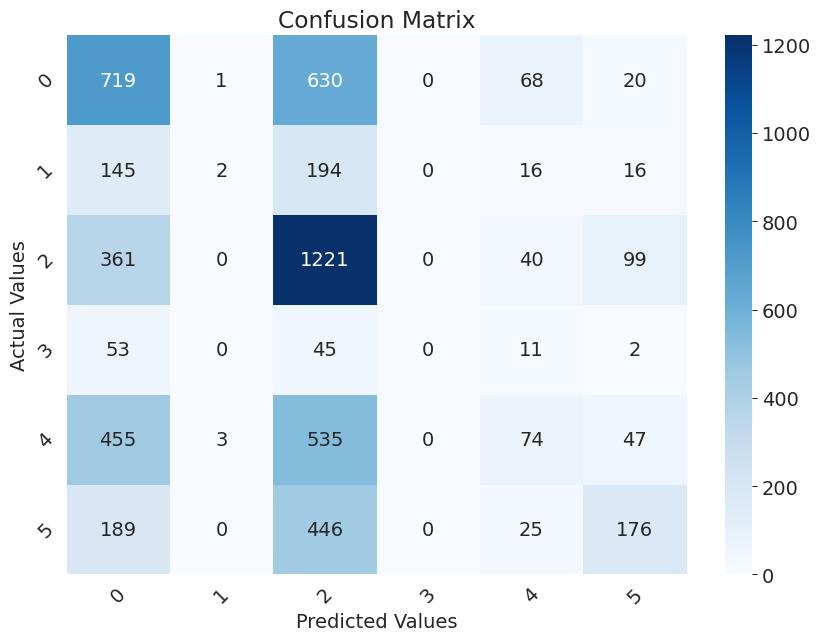

In [ ]:
cm = svm_metrics[5]
# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

# Adjust label size
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()